In [1]:
%store -r df
%store -r dftitcrew

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from 'C:\\Users\\damni\\flatiron-ds-course\\mod1proj\\Prjoect\\functions.py'>

In [6]:
df.head()

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id,movie_name,genresList
0,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,2014.0,99.0,"Action,Drama,Thriller",7.2,46103.0,tt2614684,'71,"[Action, Drama, Thriller]"
1,FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,2013.0,117.0,"Drama,War",7.1,6848.0,tt2353767,"1,000 Times Good Night","[Drama, War]"
2,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,2016.0,103.0,"Drama,Horror,Mystery",7.2,260383.0,tt1179933,10 Cloverfield Lane,"[Drama, Horror, Mystery]"
3,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,2015.0,111.0,Drama,6.7,1114.0,tt3453052,10 Days in a Madhouse,[Drama]
4,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,2011.0,100.0,"Comedy,Drama,Romance",6.1,22484.0,tt1715873,10 Years,"[Comedy, Drama, Romance]"


In [7]:
dfcrew = dftitcrew.fillna('nm')

In [8]:
dfcrew['writersList'] = fun.splitNewCol(dfcrew, 'writers')
dfcrew['directorsList'] = fun.splitNewCol(dfcrew, 'directors')

In [9]:
dfcrew = dfcrew.drop(['directors', 'writers'], axis = 1)

In [10]:
dfcrew.head()

,tconst,writersList,directorsList
0,tt0285252,[nm0899854],[nm0899854]
1,tt0438973,"[nm0175726, nm1802864]",[nm]
2,tt0462036,[nm1940585],[nm1940585]
3,tt0835418,"[nm0310087, nm0841532]",[nm0151540]
4,tt0878654,[nm0284943],"[nm0089502, nm2291498, nm2292011]"


In [11]:
dfcrew['writerCount'] = fun.countNewCol(dfcrew, 'writersList')
dfcrew['directorCount'] = fun.countNewCol(dfcrew, 'directorsList')

In [12]:
dfcrew.head()

,tconst,writersList,directorsList,writerCount,directorCount
0,tt0285252,[nm0899854],[nm0899854],1,1
1,tt0438973,"[nm0175726, nm1802864]",[nm],2,1
2,tt0462036,[nm1940585],[nm1940585],1,1
3,tt0835418,"[nm0310087, nm0841532]",[nm0151540],2,1
4,tt0878654,[nm0284943],"[nm0089502, nm2291498, nm2292011]",1,3


In [13]:
dfcrew2 = dfcrew.drop(['writersList', 'directorsList'], axis = 1)

In [14]:
dfcrew2 = dfcrew2.set_index('tconst')

In [15]:
dfcrew2.head()

,writerCount,directorCount
tconst,,
tt0285252,1,1
tt0438973,2,1
tt0462036,1,1
tt0835418,2,1
tt0878654,1,3


In [16]:
df = df.set_index('movie_id')

In [17]:
df.head()

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,start_year,runtime_minutes,genres,averagerating,numvotes,movie_name,genresList
movie_id,,,,,,,,,,,,,,
tt2614684,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,2014.0,99.0,"Action,Drama,Thriller",7.2,46103.0,'71,"[Action, Drama, Thriller]"
tt2353767,FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,2013.0,117.0,"Drama,War",7.1,6848.0,"1,000 Times Good Night","[Drama, War]"
tt1179933,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,2016.0,103.0,"Drama,Horror,Mystery",7.2,260383.0,10 Cloverfield Lane,"[Drama, Horror, Mystery]"
tt3453052,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,2015.0,111.0,Drama,6.7,1114.0,10 Days in a Madhouse,[Drama]
tt1715873,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,2011.0,100.0,"Comedy,Drama,Romance",6.1,22484.0,10 Years,"[Comedy, Drama, Romance]"


In [18]:
df = df.join(dfcrew2)

In [19]:
df.head()

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,start_year,runtime_minutes,genres,averagerating,numvotes,movie_name,genresList,writerCount,directorCount
tt0249516,NaN,0.0,73706.0,NaN,"Dec 31, 2012",45000000.0,73706.0,2012.0,91.0,"Action,Animation,Comedy",1.9,8248.0,Foodfight!,"[Action, Animation, Comedy]",5,1
tt0293429,NaN,70433227.0,51700000.0,NaN,"Aug 18, 1995",20000000.0,122133227.0,2021.0,NaN,"Action,Adventure,Fantasy",NaN,NaN,Mortal Kombat,"[Action, Adventure, Fantasy]",1,1
tt0315642,Relbig.,1100000.0,0.0,2016.0,NaN,0.0,1100000.0,2016.0,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,"[Action, Crime, Drama]",8,1
tt0337692,IFC,744000.0,8000000.0,2012.0,"Mar 22, 2013",25000000.0,9313302.0,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,"[Adventure, Drama, Romance]",2,1
tt0359950,Fox,58200000.0,129900000.0,2013.0,"Dec 25, 2013",91000000.0,187861183.0,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama]",2,1


In [20]:
grouped = df.groupby(['directorCount', 'writerCount'])[['domestic_gross', 'foreign_gross', 'production_budget', 'worldwide_gross', 'runtime_minutes', 'averagerating', 'numvotes']]

In [21]:
df2 = df[df.directorCount !=34]
%store df2

Stored 'df2' (DataFrame)


In [22]:
df.loc[df['directorCount'] == 34]

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,start_year,runtime_minutes,genres,averagerating,numvotes,movie_name,genresList,writerCount,directorCount
tt1687247,NGE,253000.0,0.0,2011.0,NaN,0.0,253000.0,2011.0,95.0,"Documentary,Drama",7.7,14367.0,Life in a Day,"[Documentary, Drama]",1,34


In [23]:
grouped.count()

domestic_gross  foreign_gross  production_budget  \
directorCount writerCount                                                     
1             1                      2280           2280               2280   
              2                      1298           1298               1298   
              3                       623            623                623   
              4                       254            254                254   
              5                       134            134                134   
              6                        49             49                 49   
              7                        29             29                 29   
              8                        12             12                 12   
              9                         8              8                  8   
              10                        8              8                  8   
              11                        2              2                  2   
              13                        1              1                  1   
              14                        1              1                  1   
              25                        1              1                  1   
2             1                       154            154                154   
              2                       117            117                117   
              3                        61             61                 61   
              4                        31             31                 31   
              5                        18             18                 18   
              6                        10             10                 10   
              7                         4              4                  4   
              8                         4              4                  4   
              9                         2              2                  2   
              10                        1              1                  1   
              12                        1              1                  1   
3             1                        10             10                 10   
              2                         7              7                  7   
              3                         7              7                  7   
              4                         3              3                  3   
              5                         1              1                  1   
              6                         2              2                  2   
              8                         2              2                  2   
              9                         2              2                  2   
4             1                         5              5                  5   
              3                         2              2                  2   
              4                         1              1                  1   
              5                         1              1                  1   
              8                         1              1                  1   
5             1                         1              1                  1   
              4                         1              1                  1   
              5                         2              2                  2   
              9                         1              1                  1   
6             1                         1              1                  1   
              6                         1              1                  1   
              7                         1              1                  1   
              10                        1              1                  1   
7             5                         1              1                  1   
              7                         1              1                  1   
8             1                         2              2                  2  

In [24]:
grouped1 = df.groupby(['directorCount', 'writerCount'])[['worldwide_gross', 'production_budget']].mean()

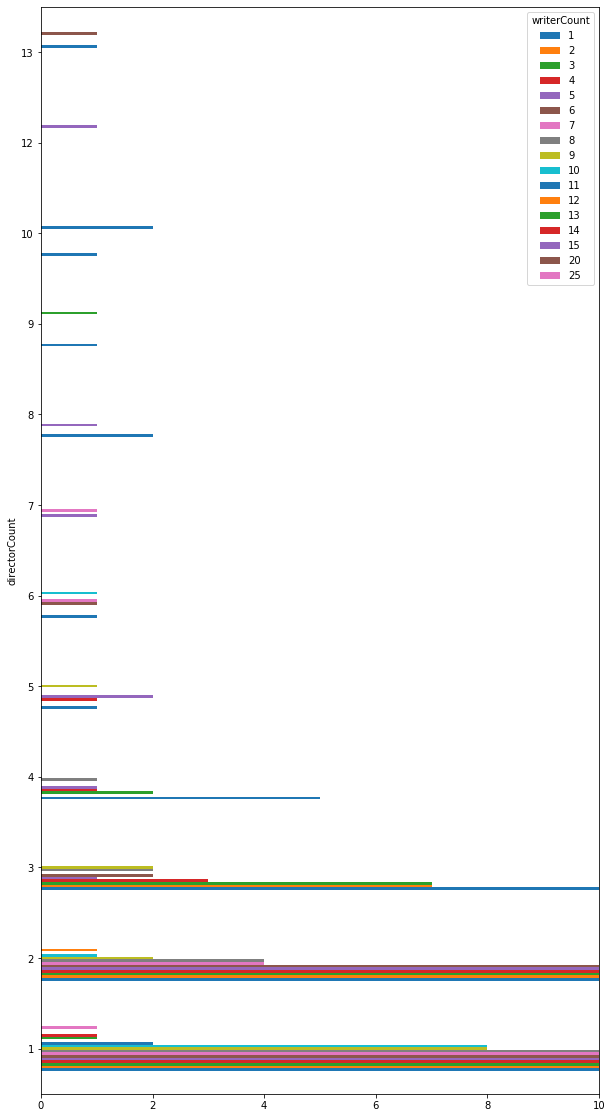

In [25]:
fig, ax = plt.subplots(figsize = (10,20))
ax.set_xlim([0,10])
df2.groupby(['directorCount', 'writerCount']).count()['worldwide_gross'].unstack().plot(kind = 'barh', ax=ax)

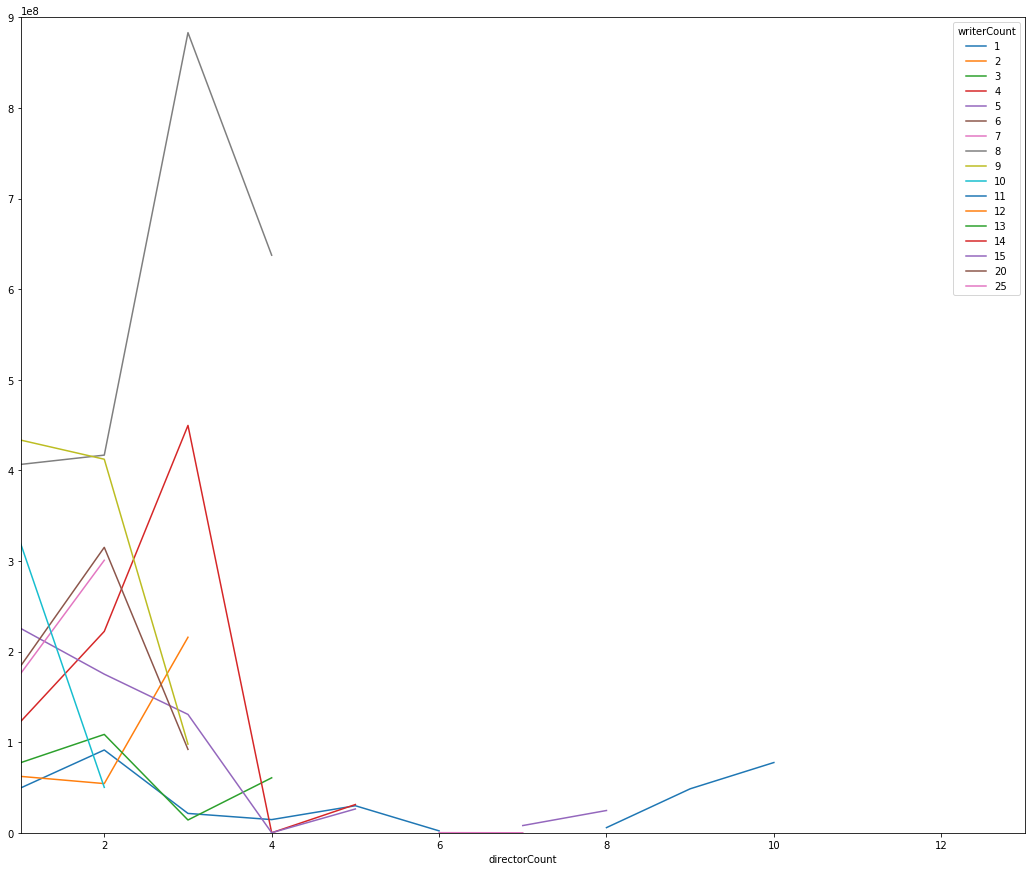

In [26]:
fig, ax = plt.subplots(figsize = (18,15))
ax.set_ylim([0 ,900000000])
df2.groupby(['directorCount', 'writerCount']).mean()['worldwide_gross'].unstack().plot(ax=ax)

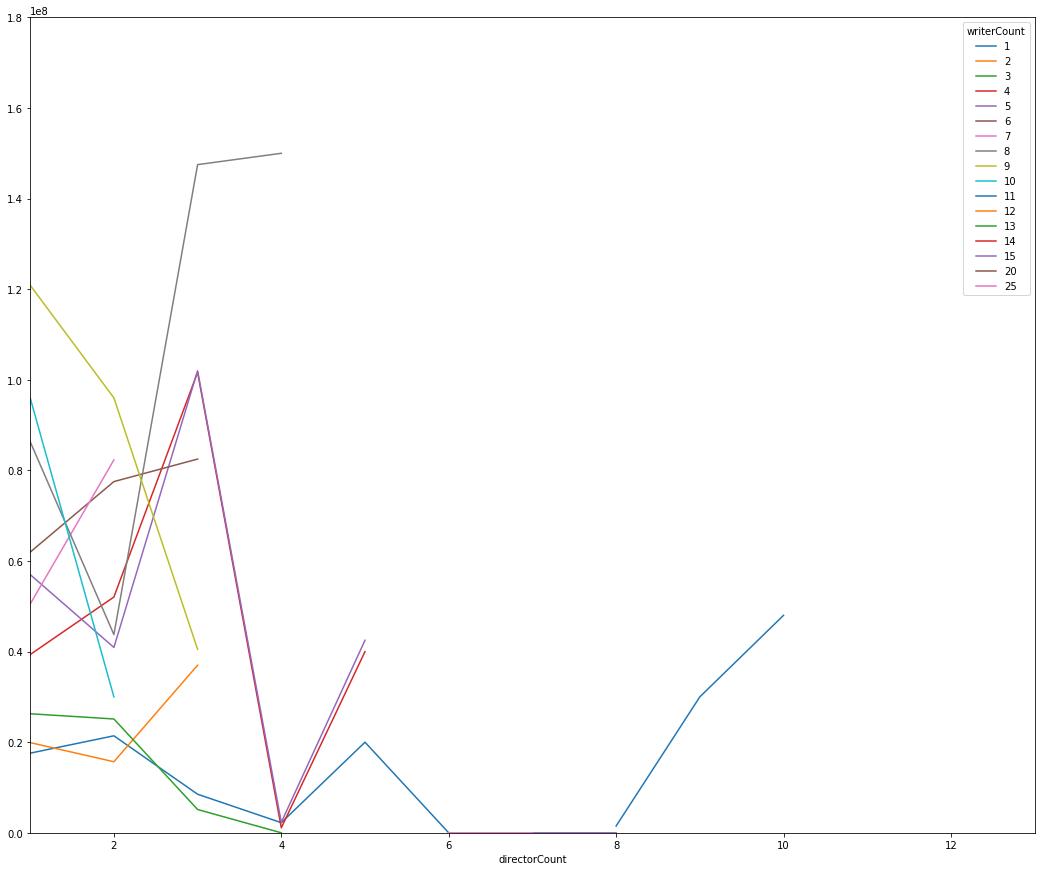

In [27]:
fig, ax = plt.subplots(figsize = (18,15))
ax.set_ylim([0 ,180000000])
df2.groupby(['directorCount', 'writerCount']).mean()['production_budget'].unstack().plot(ax=ax)

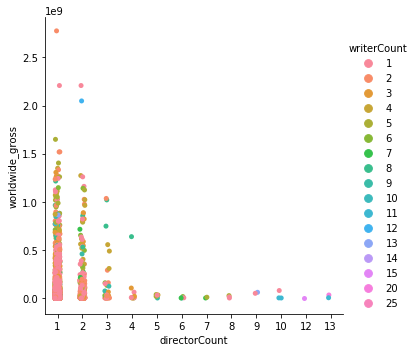

In [28]:
#plt.figure(figsize = (30,18))
sns.catplot(x='directorCount', y = 'worldwide_gross', hue = 'writerCount',  data = df2)

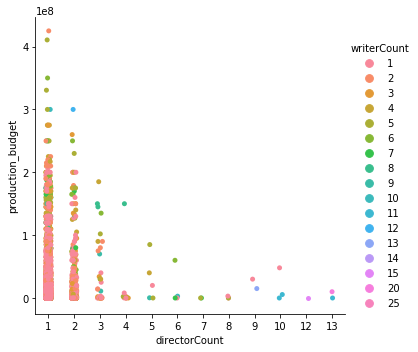

In [29]:
#fig, ax = plt.subplots(figsize = (15,18))
sns.catplot(x='directorCount', y = 'production_budget', hue = 'writerCount',  data = df2);

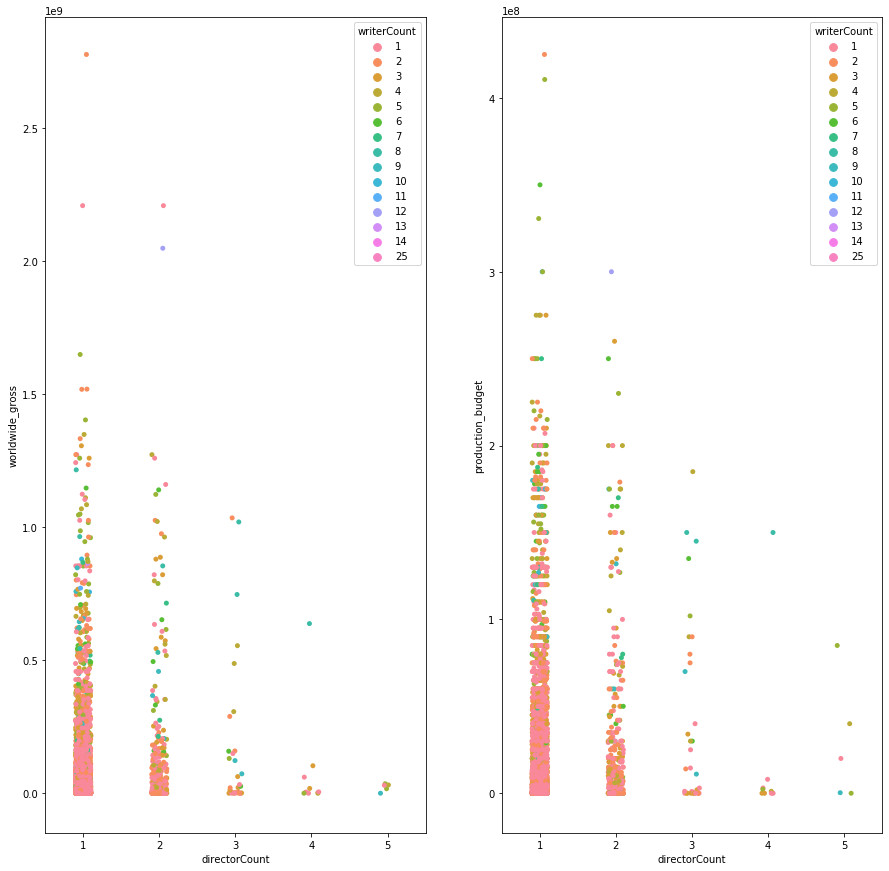

In [30]:
newfig = plt.figure(figsize = (15,15))
ax = newfig.add_subplot(121)
ax2 = newfig.add_subplot(122)
sns.catplot(x='directorCount', y = 'worldwide_gross', hue = 'writerCount',  data = df2.query('directorCount < 6'), ax = ax)
sns.catplot(x='directorCount', y = 'production_budget', hue = 'writerCount',  data = df2.query('directorCount < 6'), ax = ax2)
plt.close(2)
plt.close(3)

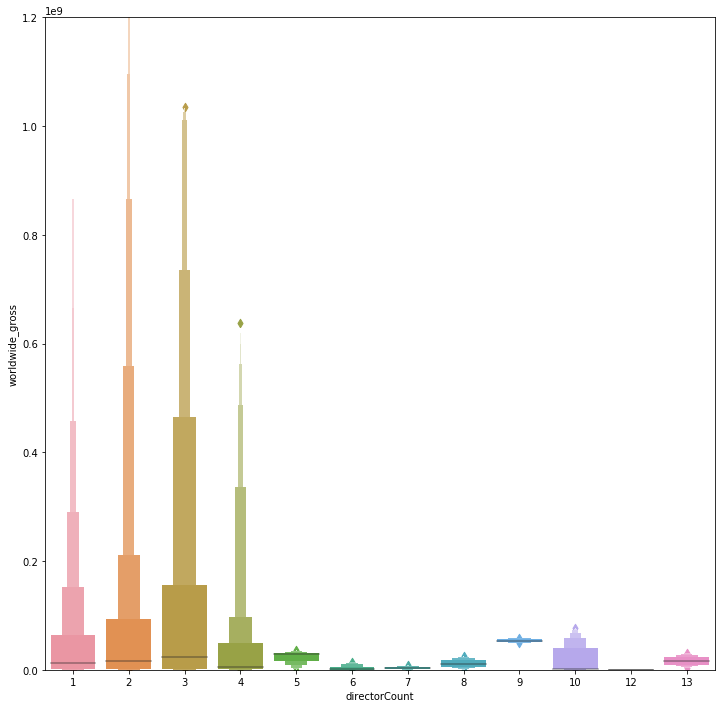

In [31]:
fig, ax = plt.subplots(figsize = (12,12))
ax.set_ylim([0 ,1200000000])
sns.catplot(x='directorCount', y = 'worldwide_gross', kind = 'boxen', data = df2, ax=ax)
plt.close(2)

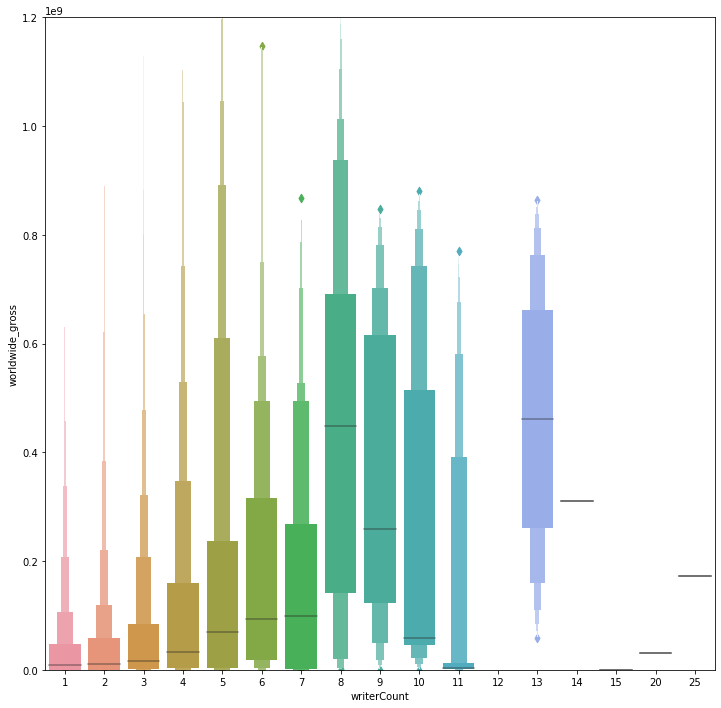

In [32]:
fig, ax = plt.subplots(figsize = (12,12))
ax.set_ylim([0 ,1200000000])
sns.catplot(x='writerCount', y = 'worldwide_gross', kind = 'boxen', data = df2, ax=ax)
plt.close(2)